In [4]:
!pip install numpy
!pip install matplotlib
!pip install scipy

  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/44.5 MB 22.7 MB/s eta 0:00:02
   -------- ------------------------------- 8.9/44.5 MB 21.8 MB/s eta 0:00:02
   ------------ --------------------------- 14.2/44.5 MB 22.4 MB/s eta 0:00:02
   --------------- ------------------------ 17.3/44.5 MB 20.6 MB/s eta 0:00:02
   ------------------- -------------------- 21.5/44.5 MB 20.5 MB/s eta 0:00:02
   ----------------------- ---------------- 26.5/44.5 MB 20.9 MB/s eta 0:00:01
   ---------------------------- ----------- 31.2/44.5 MB 21.1 MB/s eta 0:00:01
   -------------------------------- ------- 36.2/44.5 MB 20.9 MB/s eta 0:00:01
   ------------------------------------ --- 40.9/44.5 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 20.4 MB/s eta 

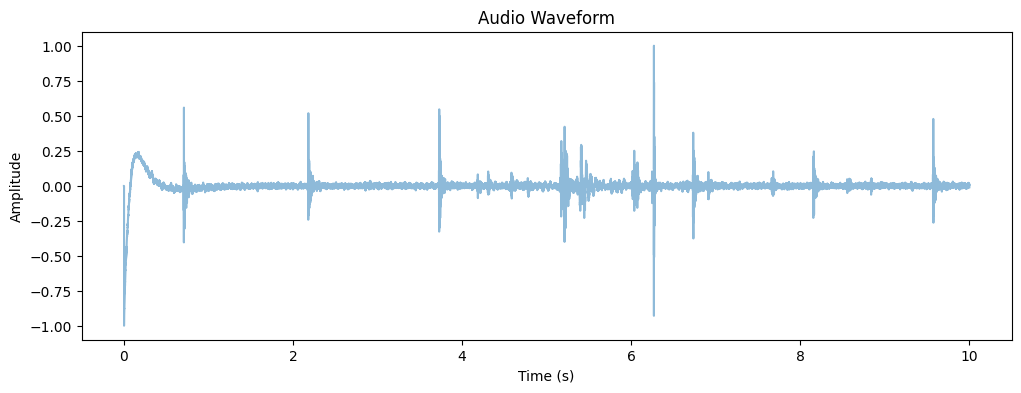

Detected hits at: [0.70988662 2.18154195 3.72938776 5.2124263  6.26888889 6.73358277
 9.57310658] seconds
Saved segment 1: hit_1.wav
Saved segment 2: hit_2.wav
Saved segment 3: hit_3.wav
Saved segment 4: hit_4.wav
Saved segment 5: hit_5.wav
Saved segment 6: hit_6.wav
Saved segment 7: hit_7.wav


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

# Load the audio file
file_path = r"C:\Users\kanup\OneDrive\Desktop\1.wav"
sample_rate, signal = wavfile.read(file_path)

# If the signal has multiple channels, convert it to mono
if len(signal.shape) > 1:
    signal = signal.mean(axis=1)

# Normalize the signal
signal = signal / np.max(np.abs(signal))

# Plot the waveform to visualize
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(signal) / sample_rate, len(signal)), signal, alpha=0.5)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Detect peaks corresponding to axe hits
peaks, _ = find_peaks(signal, height=0.3, distance=sample_rate // 4)  # Adjust height and distance
peak_times = peaks / sample_rate  # Convert peak indices to time
print(f"Detected hits at: {peak_times} seconds")

# Split the audio into segments based on peaks
segments = []
for i, peak in enumerate(peaks):
    start_sample = int(peak - 0.2 * sample_rate)  # 200ms before the peak
    end_sample = int(peak + 0.2 * sample_rate)   # 200ms after the peak
    start_sample = max(0, start_sample)
    end_sample = min(len(signal), end_sample)
    
    segments.append(signal[start_sample:end_sample])
    
    # Save each segment as a new .wav file
    wavfile.write(f"hit_{i + 1}.wav", sample_rate, (segments[-1] * 32767).astype(np.int16))
    print(f"Saved segment {i + 1}: hit_{i + 1}.wav")
